---

Тестовое задание ABBYY (NLP)

---


Выполнила: Софья Марцинович

---

## Формулировка задания

Входные данные содержат данные по химическому составу вина. Нужно угадать качество – оценку, поставленную экспертами на основании вкусовых ощущений.

***Data fields***

* **fixed acidity**
most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* **volatile acidity**
the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* **citric acid**
found in small quantities, citric acid can add 'freshness' and flavor to wines
* **residual sugar**
the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
* **chlorides**
the amount of salt in the wine
* **free sulfur dioxide**
the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
* **total sulfur dioxide**
amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
* **density**
the density of water is close to that of water depending on the percent alcohol and sugar content
* **pH**
describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
* **sulphates**
a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
* **alcohol**
the percent alcohol content of the wine
* **quality**
output variable (based on sensory data, score between 0 and 10)




---



## Подготовка к работе

In [0]:
### Первостепенной важности
import pandas as pd
import numpy as np

### Графические библиотеки
import matplotlib.pyplot as plt
import seaborn as sns 

### Средства Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


### Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Модели
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB




---



## Просмотр данных

Загружаем данные:

In [0]:
wines=pd.read_csv('winequality-red.csv', sep='\;', engine='python')

Выводим несколько строк датафрейма для просмотра:

In [0]:
wines.head()

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Размеры датафрейма:

In [0]:
wines.shape

(1599, 12)

Более подробная информация о содержимом датафрейма:

In [0]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
"fixed acidity"           1599 non-null float64
"volatile acidity"        1599 non-null float64
"citric acid"             1599 non-null float64
"residual sugar"          1599 non-null float64
"chlorides"               1599 non-null float64
"free sulfur dioxide"     1599 non-null float64
"total sulfur dioxide"    1599 non-null float64
"density"                 1599 non-null float64
"pH"                      1599 non-null float64
"sulphates"               1599 non-null float64
"alcohol"                 1599 non-null float64
"quality"                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Посчитаем, сколько нечитаемых("non available", "na") значений в каждом столбце:

In [0]:
wines.isna().sum()

"fixed acidity"           0
"volatile acidity"        0
"citric acid"             0
"residual sugar"          0
"chlorides"               0
"free sulfur dioxide"     0
"total sulfur dioxide"    0
"density"                 0
"pH"                      0
"sulphates"               0
"alcohol"                 0
"quality"                 0
dtype: int64

ВЫВОД: имеем дело с 1599 строками полностью пригодных для работы данных!

На всякий случай создаем копию исходного датафрейма:

In [0]:
wines_copy = wines.copy()

In [0]:
wines.head()

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5




---



## Изучение зависимостей. Визуализация

Выделяем "target variable" - независимую переменную ("quality", в нашем случае). Все остальные переменные называем "features" и объединяем в список:

In [0]:
target = '"quality"'
features_list = list(wines.columns)
features_list.remove(target)

Строим гистограммы по каждой переменной из features_list:

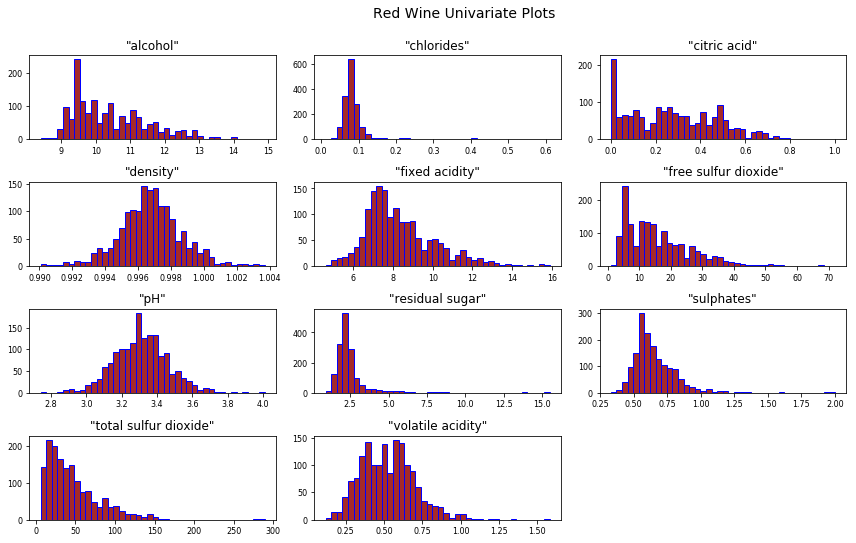

In [0]:
wines[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(10,6), color='brown')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14);

Посмотрим, сколько уникальных значений в колонке "quality":

In [0]:
wines[target].unique()

array([5, 6, 7, 4, 8, 3])

Построим гистограмму по уникальным значениям колонки "quality":

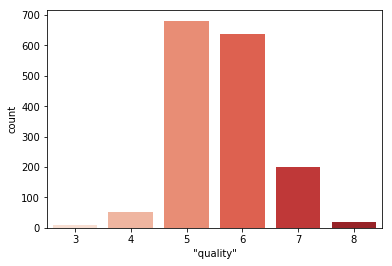

In [0]:
sns.countplot(x=target, data=wines, palette='Reds')

In [0]:
wines[target].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: "quality", dtype: int64

ВЫВОД: с большим отрывом преобладает вино с оценкой качества "5" или "6".

Составим матрицу корреляции, чтобы оценить зависимости между переменными.
Представим матрицу в виде heatmap:

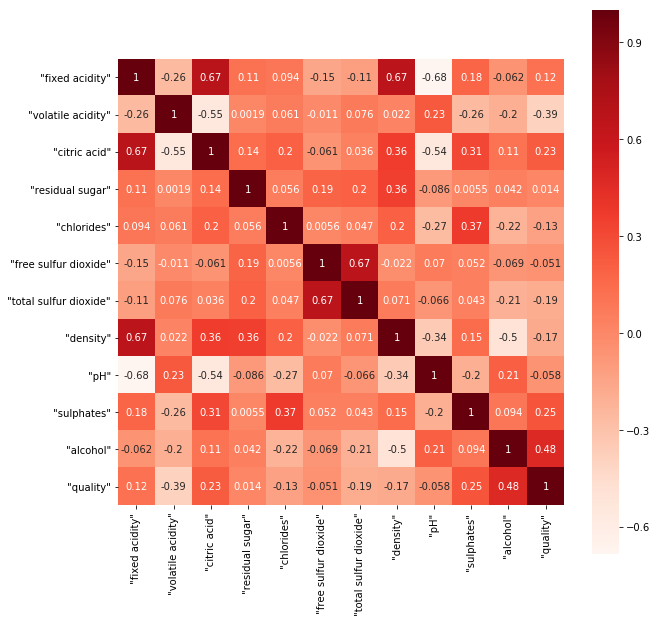

In [0]:
correlation = wines.corr()

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Reds')

ВЫВОДЫ:
* Из матрицы видно, что показатель уровня содержания алкоголя ("alcohol") имеет самый высокий положительный коэффициент корреляции (0.48) с показателем качества вина ("quality").
* Также можно заметить, что коэффициент корреляции "pH"-"fixed acidity" большой по модулю и отрицательный (-0.68). Это объяснается тем, что "fixed acidity" - мера кислотности, а  "pH" - показатель уровня pH, который принимает значения от 0 до 14: чем выше кислотность, тем ближе значение к нулю. Из описания данных: "most wines are acidic and have a pH of 3-4".
* Также высокими положительными (0.67) являются коэффициенты корреляции "fixed acidity"-"density", "fixed acidity"-"citric acid", "total sulfur dioxide"-"free sulfur dioxide".



---



## Подготовка данных 

Будем называть независимую переменную (аргумент) - X, а зависимую - y.



In [0]:
X = wines[features_list]
y = wines[target]

Проверим размерности:

In [0]:
X.shape

(1599, 11)

In [0]:
y.shape

(1599,)

Что получилось:

In [0]:
X.head()

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [0]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: "quality", dtype: int64

Разбиваем данные на две части: тренировочную (train) и тестовую (test):

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

Стандартизируем данные:

После применения StandardScaler() каждый столбец в X будет иметь среднее значение 0 и стандартное отклонение 1.

In [0]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



---



## Обучение моделей и предсказания

Метод Support Vector Machine:

In [0]:
svc = SVC()
svc.fit(X_train,y_train)
svc_predict =svc.predict(X_test)

Посмотрим на матрицу ошибок и точность предсказаний:

In [0]:
print('Confusion matrix:\n')
classes = [3,4,5,6,7,8]
total_classes = len(classes)
level_labels = [total_classes*[0], list(range(total_classes))]

cm = metrics.confusion_matrix(y_test, svc_predict, labels=classes)
cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels),index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))
print(cm_frame)

svc_acc_score = accuracy_score(y_test, svc_predict)
print('-'*60)
print('Accuracy: ',svc_acc_score)
print('-'*60)

Confusion matrix:

          Predicted:                  
                   3  4    5   6  7  8
Actual: 3          0  0    1   1  0  0
        4          0  0    8   3  0  0
        5          0  0  101  34  0  0
        6          0  0   39  97  6  0
        7          0  0    1  18  8  0
        8          0  0    0   1  2  0
------------------------------------------------------------
Accuracy:  0.64375
------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  import sys



Результаты хорошо обученного классификатора показывают матрицу ошибок, в которой самые большие значения стоят на диагонали матрицы, а небольшие значения (в идеале нули) – на остальных позициях.

В нашем случае, достаточно большие значения наблюдаются на пересечениях Actual-5/Predicted-6 и Actual-6/Predicted-5. Интуитивно, это можно объяснить тем, что эти два значения являются соседними и именно они преобладают  в колонке "'quality'" рассматриваемого датафрейма.


Метод Logistic Regression:

In [0]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Посмотрим на матрицу ошибок и точность предсказаний:

In [0]:
print('Confusion matrix:\n')
classes = [3,4,5,6,7,8]
total_classes = len(classes)
level_labels = [total_classes*[0], list(range(total_classes))]

cm = metrics.confusion_matrix(y_test, lr_predict, labels=classes)
cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels),index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))
print(cm_frame)

lr_acc_score = accuracy_score(y_test, lr_predict)
print('-'*60)
print('Accuracy: ',lr_acc_score)
print('-'*60)

Confusion matrix:

          Predicted:                   
                   3  4    5   6   7  8
Actual: 3          0  0    2   0   0  0
        4          0  0    6   4   1  0
        5          0  0  107  28   0  0
        6          0  0   42  87  13  0
        7          0  0    2  18   7  0
        8          0  0    0   1   2  0
------------------------------------------------------------
Accuracy:  0.628125
------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  import sys


Метод Decision Tree:

In [0]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

Посмотрим на матрицу ошибок и точность предсказаний:

In [0]:
print('Confusion matrix:\n')
classes = [3,4,5,6,7,8]
total_classes = len(classes)
level_labels = [total_classes*[0], list(range(total_classes))]

cm = metrics.confusion_matrix(y_test, dt_predict, labels=classes)
cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels),index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))
print(cm_frame)

dt_acc_score = accuracy_score(y_test, dt_predict)
print('-'*60)
print('Accuracy: ',dt_acc_score)
print('-'*60)

Confusion matrix:

          Predicted:                  
                   3  4   5   6   7  8
Actual: 3          0  0   0   2   0  0
        4          0  2   5   4   0  0
        5          0  5  95  30   5  0
        6          0  4  27  95  15  1
        7          0  0   2   3  17  5
        8          0  0   0   1   2  0
------------------------------------------------------------
Accuracy:  0.653125
------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  import sys


Метод Random Forest: 

In [0]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Посмотрим на матрицу ошибок и точность предсказаний:

In [0]:
print('Confusion matrix:\n')
classes = [3,4,5,6,7,8]
total_classes = len(classes)
level_labels = [total_classes*[0], list(range(total_classes))]

cm = metrics.confusion_matrix(y_test, rf_predict, labels=classes)
cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels),index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))
print(cm_frame)

rf_acc_score = accuracy_score(y_test, rf_predict)
print('-'*60)
print('Accuracy: ',rf_acc_score)
print('-'*60)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  import sys


Confusion matrix:

          Predicted:                    
                   3  4    5    6   7  8
Actual: 3          0  0    2    0   0  0
        4          0  0    7    3   1  0
        5          0  0  112   18   5  0
        6          0  1   32  102   7  0
        7          0  0    0   10  15  2
        8          0  0    0    1   2  0
------------------------------------------------------------
Accuracy:  0.715625
------------------------------------------------------------


Метод Naive Bayes:

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

Посмотрим на матрицу ошибок и точность предсказаний:

In [0]:
print('Confusion matrix:\n')
classes = [3,4,5,6,7,8]
total_classes = len(classes)
level_labels = [total_classes*[0], list(range(total_classes))]

cm = metrics.confusion_matrix(y_test, nb_predict, labels=classes)
cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels),index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))
print(cm_frame)

nb_acc_score = accuracy_score(y_test, nb_predict)
print('-'*60)
print('Accuracy: ',nb_acc_score)
print('-'*60)

Confusion matrix:

          Predicted:                  
                   3  4   5   6   7  8
Actual: 3          0  0   1   1   0  0
        4          0  0   7   3   0  1
        5          2  5  85  35   8  0
        6          0  3  31  73  29  6
        7          1  0   0   9  15  2
        8          0  0   0   0   3  0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  import sys


------------------------------------------------------------
Accuracy:  0.540625
------------------------------------------------------------




---



## Подведение итогов

Составим сводную таблицу четырех использованных методов и точности предсказаний:

In [0]:
conclusion = pd.DataFrame({'Модель': ["Support Vector Machine","Logistic Regression","Decision Tree", "Random Forest", "Naive Bayes"],
                           'Точность': [svc_acc_score,lr_acc_score,dt_acc_score,rf_acc_score,nb_acc_score]})
conclusion

,Модель,Точность
0,Support Vector Machine,0.643750
1,Logistic Regression,0.628125
2,Decision Tree,0.653125
3,Random Forest,0.715625
4,Naive Bayes,0.540625


ВЫВОД: наиболее точные предсказания дают методы Decision Tree и Random Forest.



---

